In [45]:
import pandas as pd
import matplotlib.pyplot as plt
csv_file = "Green Taxi Average.csv"
df = pd.read_csv(csv_file)
df

,Date,Total_Passenger,Avg_Passen,Total_trip,Total_dist(mi),Avg_Dist(mi),Avg_speed(mi/h),Avg_duration(s)
0,1/1/2016,90227,1.41615,63713,205514.0,3.22563,17.2715,764.513
1,1/2/2016,64156,1.37733,46580,132882.0,2.85277,16.9720,730.154
2,1/3/2016,60168,1.36998,43919,128878.0,2.93444,17.0585,711.582
3,1/4/2016,58913,1.35398,43511,111508.0,2.56276,15.8993,721.473
4,1/5/2016,56094,1.33265,42092,109424.0,2.59964,14.8819,756.675
...,...,...,...,...,...,...,...,...
361,12/27/2016,35732,1.36257,26224,68983.3,2.63054,16.2823,723.765
362,12/28/2016,41195,1.35747,30347,77154.1,2.54240,14.5468,725.461
363,12/29/2016,42040,1.34494,31258,77859.9,2.49088,14.9418,701.935
364,12/30/2016,53242,1.36040,39137,98613.0,2.51969,15.3591,725.096


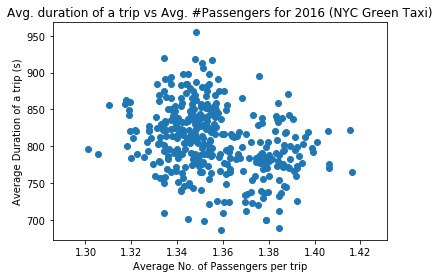

In [60]:
x_axis = df['Avg_Passen']
y_axis = df['Avg_duration(s)']
plt.scatter(x_axis,y_axis)
plt.xlabel("Average No. of Passengers per trip")
plt.ylabel("Average Duration of a trip (s)")
plt.title("Avg. duration of a trip vs Avg. #Passengers for 2016 (NYC Green Taxi)")
plt.show()

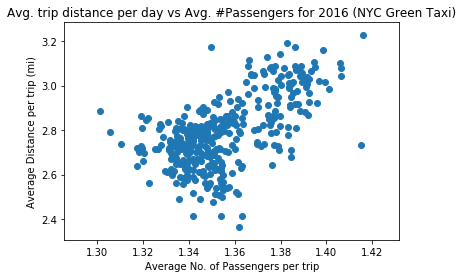

In [61]:
x_axis = df['Avg_Passen']
y_axis = df['Avg_Dist(mi)']
plt.scatter(x_axis,y_axis)
plt.xlabel("Average No. of Passengers per trip")
plt.ylabel("Average Distance per trip (mi)")
plt.title("Avg. trip distance per day vs Avg. #Passengers for 2016 (NYC Green Taxi)")
plt.show()

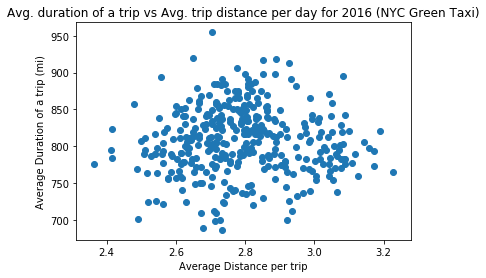

In [62]:
x_axis = df['Avg_Dist(mi)']
y_axis = df['Avg_duration(s)']
plt.scatter(x_axis,y_axis)
plt.xlabel("Average Distance per trip")
plt.ylabel("Average Duration of a trip (mi)")
plt.title("Avg. duration of a trip vs Avg. trip distance per day for 2016 (NYC Green Taxi)")
plt.show()

[121544.43181818182, 123826.6823255815, 127497.52734374999, 119562.37199999999, 123833.35500000001]


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/Event Bar Chat - Average Total Taxi Distance.png'

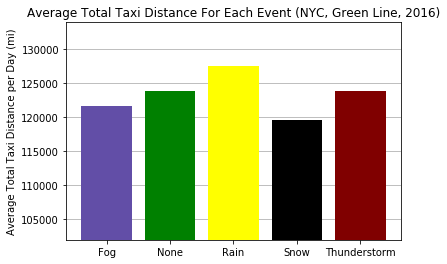

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import matplotlib.dates as dates



def dataPlot(x, y, x_label, y_label, title, logPlot):
    fig, ax = plt.subplots()
    #fit = np.polyfit(x, y, deg=1)
    #ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y, marker='.', label='Day in 2016')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
    if logPlot == False:
        plt.savefig('Plots/'+title+'.png', bbox_inches='tight')
    else:
        plt.xscale('log')
        plt.yscale('log')
        plt.savefig('Plots/'+title+' - log scaled'+'.png', bbox_inches='tight')
    
    #plt.show()
    return

def datePlot(x, y, x_label, y_label, title):
    plt.plot(x, y, marker='.')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.gcf().autofmt_xdate()
    plt.show()
    return

def eventList(event, weather_data, stats_data):
    Event_List = weather_data['Event'].values
    Total_Trips = stats_data['Total_trip'].values

    Total_Event_trips = []

    countIndex = 0
    for val in Event_List:
        if event in str(val):
            Total_Event_trips.append(Total_Trips[countIndex])
        countIndex += 1

    plt.boxplot(Total_Event_trips)
    plt.title("Total Passengers during day of " + event)
    plt.ylabel("Total Passengers per day")
    plt.show()

def eventBarPlot(weather_data, stats_column, label_label, label_format):
    Event_List = weather_data['Event'].values

    Events = ['Fog', 'nan', 'Rain', 'Snow', 'Thunderstorm']
    Event_freq = [0.0, 0.0, 0.0, 0.0, 0.0]
    colors = ['#624ea7', 'g', 'yellow', 'k', 'maroon']

    listItr = 0
    for eventItr in Events:
        sumTotal = 0
        sumCount = 0

        EventListItr = 0
        for item in Event_List:
            if eventItr in str(item):
                sumCount += 1
                sumTotal += stats_column[EventListItr]
            EventListItr += 1
        Event_freq[listItr] = float(sumTotal)/float(sumCount)
        listItr += 1
    print (Event_freq)
    Events[1] = "None"

    plt.bar(Events, Event_freq, color=colors)
    plt.gca().set_ylim(bottom=max(Event_freq)/1.25)
    plt.gca().set_axisbelow(True)
    plt.gca().yaxis.grid(True)

    plt.xticks(Events)
    plt.ylabel(label_label + ' per Day' + label_format)
    plt.title(label_label +' For Each Event (NYC, Green Line, 2016)')
    plt.savefig('Plots/Event Bar Chat - '+label_label+'.png', bbox_inches='tight')
    #plt.show()
    plt.close()
    return



#read and collect data
weather_data = pd.read_csv("Monthly_Weather_Raw_JFK_Updated.csv")
stats_data = pd.read_csv("new_stats.csv")


date_values = stats_data['Date'].values

#Get Weather data columns
Temp_avg = weather_data['Temp. (Degrees F) - Avg'].values
Precipitation_Sum = weather_data['Precipitation (in) - Sum'].values
Wind_avg = weather_data['Wind (mph) - Avg'].values


#Get statistics data columns
Total_dist = stats_data['Total_dist(mi)'].values
Avg_Dist = stats_data['Avg_Dist(mi)'].values
Avg_speed = stats_data['Avg_speed(mi/h)'].values
Avg_duration = stats_data['Avg_duration(s)'].values

Total_trip = stats_data['Total_trip'].values
Total_Passenger = stats_data['Total_Passenger'].values
Avg_Passen = stats_data['Avg_Passen'].values



weather_label = "Precipitation Sum (in)"
logPlotvar = False

#Bar plot code
eventBarPlot(weather_data, Total_dist, 'Average Total Taxi Distance', ' (mi)')
eventBarPlot(weather_data, Avg_Dist, 'Average Taxi Distance', ' (mi)')
eventBarPlot(weather_data, Avg_speed, 'Average Taxi Speed', ' (mph)')
eventBarPlot(weather_data, Avg_duration, 'Average Taxi Trip Duration', ' (s)')

eventBarPlot(weather_data, Total_trip, 'Average Total Taxi Trips', '')
eventBarPlot(weather_data, Total_Passenger, 'Average Total Taxi Passengers', '')
eventBarPlot(weather_data, Avg_Passen, 'Average Taxi Passengers', '')


#Scatter plot code

# #Total Distance
# dataPlot(Precipitation_Sum, Total_dist, weather_label, 'Total Taxi Distance(mi)', 'Precipitation Sum vs Total Taxi Distance (NYC, Green Line)', logPlotvar)

# #Avg Distance
# dataPlot(Precipitation_Sum, Avg_Dist, weather_label, 'Average Taxi Distance(mi)', 'Precipitation Sum vs Average Taxi Distance (NYC, Green Line)', logPlotvar)

# #Avg speed
# dataPlot(Precipitation_Sum, Avg_speed, weather_label, 'Average Taxi Speed (mi/h)', 'Precipitation Sum vs Average Taxi Speed (NYC, Green Line)', logPlotvar)

# #Avg duration
# dataPlot(Precipitation_Sum, Avg_duration, weather_label, 'Average Taxi Trip Duration (s)', 'Precipitation Sum vs Average Taxi Trip Duration (NYC, Green Line)', logPlotvar)

# #---------------------------------------------------------------------------------------

# #Total trips
# dataPlot(Precipitation_Sum, Total_trip, weather_label, 'Total Taxi Trips', 'Precipitation Sum vs Total Taxi Trips (NYC, Green Line)', logPlotvar)

# #Total Passengers
# dataPlot(Precipitation_Sum, Total_Passenger, weather_label, 'Total Taxi Passengers', 'Precipitation Sum vs Total Taxi Passengers (NYC, Green Line)', logPlotvar)

# #Avg Passengers
# dataPlot(Precipitation_Sum, Avg_Passen, weather_label, 'Average Taxi Passengers', 'Precipitation Sum vs Average Taxi Passengers (NYC, Green Line)', logPlotvar)
# dataPlot(Temp_avg, Total_Passenger, "Avg Temperature", 'Total Taxi Passengers', 'Total Taxi Passengers vs Avg temperature (NYC, Green Line)', logPlotvar)
dataPlot(Temp_avg, Avg_duration, "Avg Temperature", 'Avg Taxi Trip Duration', 'Avg Taxi Trip Duration vs Avg temperature (NYC, Green Line)', logPlotvar)


#Unused functions that were not finished
# datePlot(new_x, x, 'Day', 'Total Distance per day (mi)', 'Total Distance vs Average Temperature per Day')
#eventList("Rain", weather_data, stats_data)

#export DISPLAY=localhost:0.0